In [1]:
from Disparity import addDisparity
import pandas as pd
import yfinance as yf
from getDataFrame import getTickerDF
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Create dataframe and define price and Disparity Index series for testing
s = yf.Ticker("MSFT")
df = s.history(period = "5y", i = "1d").loc[:, ["Open", "High", "Low", "Close", "Volume"]]
df = addDisparity(df)
disparity = df["Disparity"]
price = (df["High"] + df["Low"] + df["Close"])/3


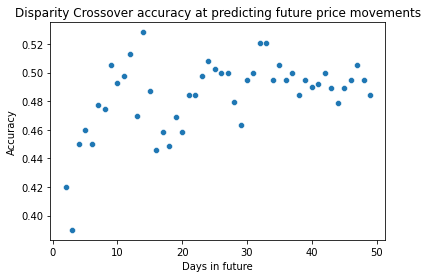

In [4]:
#Determine disparity cross signal and its accuracy 
disparitycross = []
for i in range(len(disparity) - 1):
    if disparity[i] > 0 and disparity[i+1] < 0:
        disparitycross.append("Buy")
    elif disparity[i] < 0 and disparity[i+1] > 0:
        disparitycross.append("Sell")
    else:
        disparitycross.append("Neutral")
days = []
accuracy = [] 
for i in range(2,50):
    ts = 0
    fs = 0
    for j in range(0, len(disparitycross)-i):
        if disparitycross[j] == "Sell" and price[j+1] < price[j+1+i]:
            fs += 1
        elif disparitycross[j] == "Buy" and price[j+1] > price[j+1+i]:
            fs += 1
        elif disparitycross[j] == "Buy" and price[j+1] < price[j+1+i]:
            ts += 1
        elif disparitycross[j] == "Sell" and price[j+1] > price[j+1+i]:
            ts += 1
    days.append(i)
    accuracy.append(ts/(ts+fs))

graph = sns.scatterplot(x=days, y = accuracy)
graph.set(title = "Disparity Crossover accuracy at predicting future price movements", xlabel = "Days in future", ylabel = "Accuracy")
plt.show()

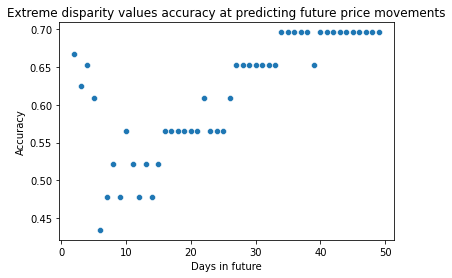

In [5]:
#Create extreme disparity indicator and determine predictive accuracy of future price movements
extremedisparity = []
for i in range(len(disparity)):
    if disparity[i] > 0.00075:
        extremedisparity.append("Drop")
    elif disparity[i] < -0.00075:
        extremedisparity.append("Rise")
    else:
        extremedisparity.append("Neutral")
days = []
accuracy = [] 
for i in range(2,50):
    ts = 0
    fs = 0
    for j in range(0, len(extremedisparity)-i):
        if extremedisparity[j] == "Drop" and price[j] < price[j+i]:
            fs += 1
        elif extremedisparity[j] == "Rise" and price[j] > price[j+i]:
            fs += 1
        elif extremedisparity[j] == "Rise" and price[j] < price[j+i]:
            ts += 1
        elif extremedisparity[j] == "Drop" and price[j] > price[j+i]:
            ts += 1
    days.append(i)
    accuracy.append(ts/(ts+fs))

graph = sns.scatterplot(x=days, y = accuracy)
graph.set(title = "Extreme disparity values accuracy at predicting future price movements", xlabel = "Days in future", ylabel = "Accuracy")
plt.show()

<AxesSubplot:>

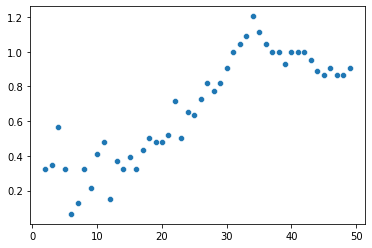

In [25]:
#Extreme disparity trading with magnitude -- concept still under development
days = []
accuracy = [] 
for i in range(2,50):
    numerator = 0
    denominator = 0
    for j in range(0, len(extremedisparity)-i):
        if extremedisparity[j] == "Drop" and price[j] < price[j+i]:

            diff = (price[j+i] - price[j]) / price[j]
            if diff > 0.1:
                numerator -= 3
            elif diff > 0.05:
                numerator -= 2
            elif diff > 0.01:
                numerator -= 1
            else:
                numerator -= 0.5
            denominator += 1
        elif extremedisparity[j] == "Rise" and price[j] > price[j+i]:
            diff = (price[j+i] - price[j]) / price[j]
            if diff < -0.1:
                numerator -= 3
            elif diff < -0.05:
                numerator -= 2
            elif diff < -0.01:
                numerator -= 1
            else:
                numerator -= 0.5
            denominator += 1
        elif extremedisparity[j] == "Rise" and price[j] < price[j+i]:
            diff = (price[j+i] - price[j]) / price[j]
            if diff > 0.1:
                numerator += 3
            elif diff > 0.05:
                numerator += 2
            elif diff > 0.01:
                numerator += 1
            else:
                numerator += 0.5
            denominator += 1
        elif extremedisparity[j] == "Drop" and price[j] > price[j+i]:
            diff = (price[j+i] - price[j]) / price[j]
            if diff < -0.1:
                numerator += 3
            elif diff < -0.05:
                numerator += 2
            elif diff < -0.01:
                numerator += 1
            else:
                numerator += 0.5
            denominator += 1
    days.append(i)
    accuracy.append(numerator/denominator)

sns.scatterplot(x=days, y = accuracy)